# <font color='DarkRed'>**TRANSFORMAÇÃO E DIFERENCIAÇÃO**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

### <font color='OrangeRed'>**Transformação**

<font color='Navy'>**AirPassengers: dados clássicos da companhia aérea Box & Jenkins. Totais mensais de passageiros de companhias aéreas internacionais, 1949 a 1960.**
 

In [4]:
dados = pd.read_csv('AirPassengers.csv',sep=',')

In [5]:
dados

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
serie = pd.Series(dados['#Passengers'].values, index = dados['Month'])
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

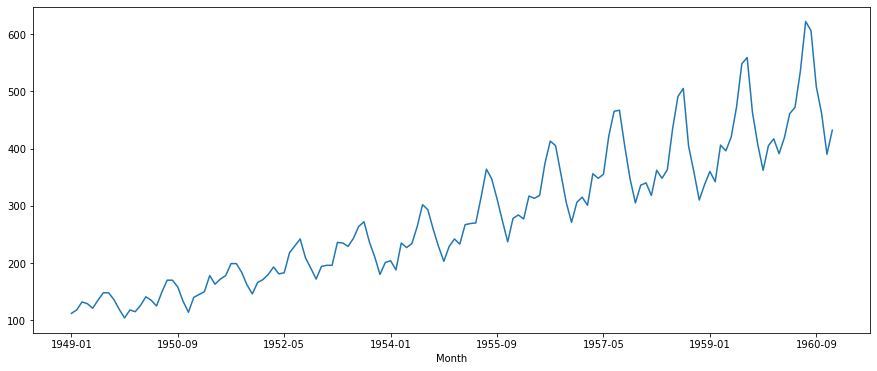

In [7]:
serie.plot()
plt.show()

In [8]:
import scipy.stats as stats

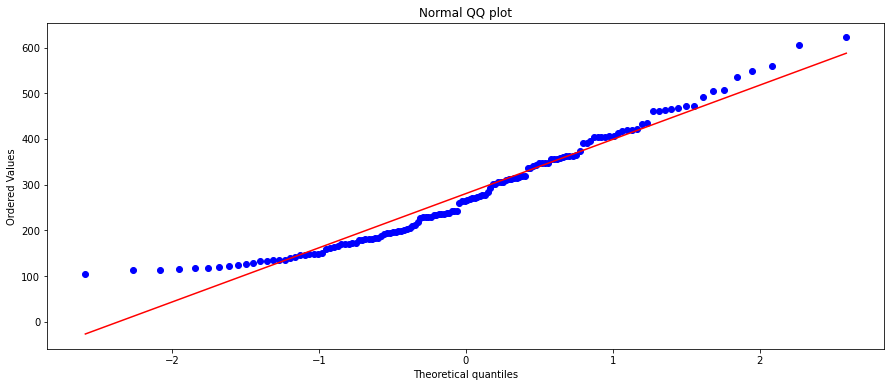

In [9]:
stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

<font color='OrangeRed'>**Teste Shapiro-Wilk**

<font color='Navy'>**CRITÉRIOS:**

<font color='Navy'>**NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)**

<font color='Navy'>**QUANDO p > 0,05 (distribuição normal).**

In [10]:
e, p = stats.shapiro(serie)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9519579410552979
p-valor: 6.832739018136635e-05


In [11]:
# Transformação por log (Diminuir variância e melhorar normalidade)
serie2 = np.log(serie)
serie2

Month
1949-01    4.718499
1949-02    4.770685
1949-03    4.882802
1949-04    4.859812
1949-05    4.795791
             ...   
1960-08    6.406880
1960-09    6.230481
1960-10    6.133398
1960-11    5.966147
1960-12    6.068426
Length: 144, dtype: float64

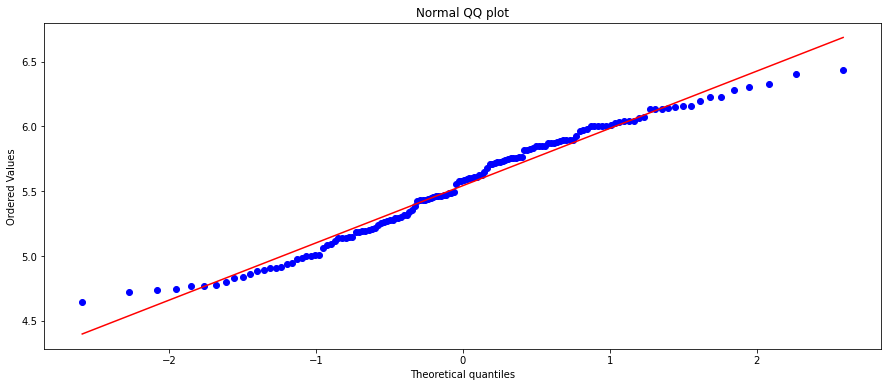

In [12]:
stats.probplot(serie2, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

<font color='OrangeRed'>**Teste Shapiro-Wilk**

<font color='Navy'>**CRITÉRIOS:**

<font color='Navy'>**NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)**

<font color='Navy'>**QUANDO p > 0,05 (distribuição normal).**

In [13]:
e, p = stats.shapiro(serie2)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.973236083984375
p-valor: 0.0063744960352778435


In [14]:
# Transformação por raiz cúbica (quando possui dados com valor zero ou negativos)
serie3 = (serie)**(1/3)
serie3

Month
1949-01    4.820285
1949-02    4.904868
1949-03    5.091643
1949-04    5.052774
1949-05    4.946087
             ...   
1960-08    8.462348
1960-09    7.979112
1960-10    7.725032
1960-11    7.306144
1960-12    7.559526
Length: 144, dtype: float64

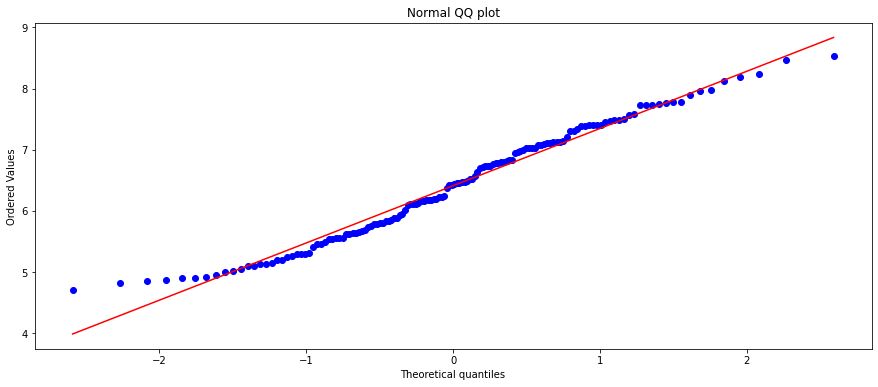

In [15]:
stats.probplot(serie3, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

<font color='OrangeRed'>**Teste Shapiro-Wilk**

<font color='Navy'>**CRITÉRIOS:**

<font color='Navy'>**NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)**

<font color='Navy'>**QUANDO p > 0,05 (distribuição normal).**

In [16]:
e, p = stats.shapiro(serie3)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.974599301815033
p-valor: 0.008835497312247753


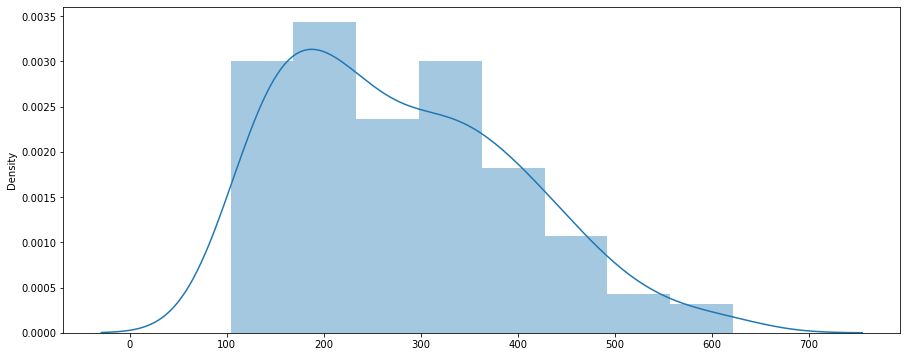

In [17]:
import seaborn as sns
sns.distplot(serie);

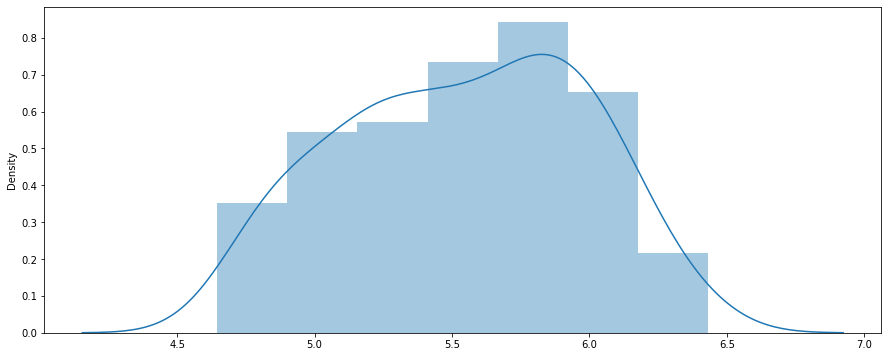

In [18]:
sns.distplot(serie2);

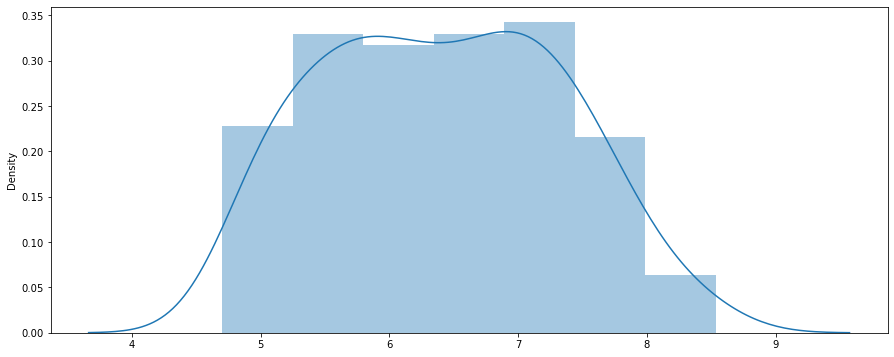

In [19]:
sns.distplot(serie3);

### <font color='DarkRed'>**DIFERENCIAÇÃO**

In [20]:
import statsmodels.tsa.stattools

<font color='OrangeRed'>**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

<font color='Navy'>**Ho = não é estacionário: estatística do teste > valor crítico**

<font color='Navy'>**Ha = é estacionário:  estatística do teste < valor crítico**

In [21]:
kpss = statsmodels.tsa.stattools.kpss(serie3)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 1.0589
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/home/miguel/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<font color='OrangeRed'>**Teste df (Dickey Fuller)**

<font color='Navy'>**Ho = não é estacionário: estatística do teste > valor crítico**

<font color='Navy'>**Ha = é estacionário:  estatística do teste < valor crítico**

In [22]:
df = statsmodels.tsa.stattools.adfuller(serie3)
print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -0.8100
p_valor: 0.81615655
Valores Críticos:
1%: -3.4817
5%: -2.8840
10%: -2.5788


In [23]:
serie4 = np.diff(serie3)

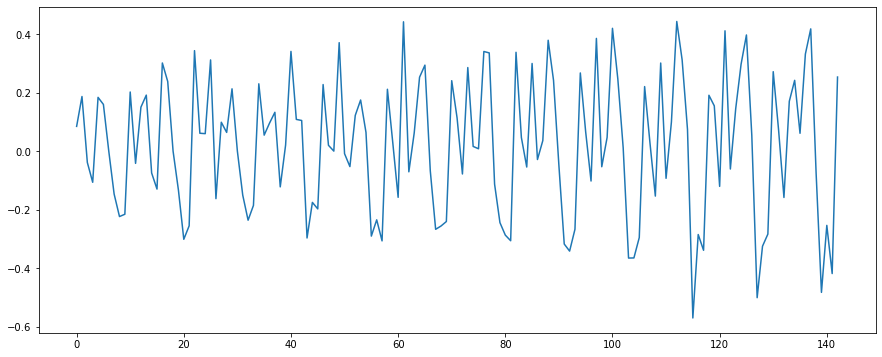

In [24]:
plt.plot(serie4)
plt.show()

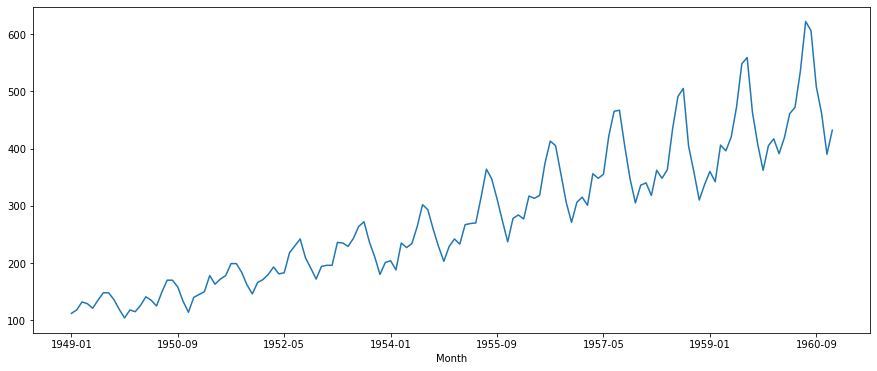

In [25]:
serie.plot()
plt.show()

In [26]:
# Cálculo da Diferenciação
#Subtração da série por um valor antecessor dela mesma
serie_diff = serie3 - serie3.shift()

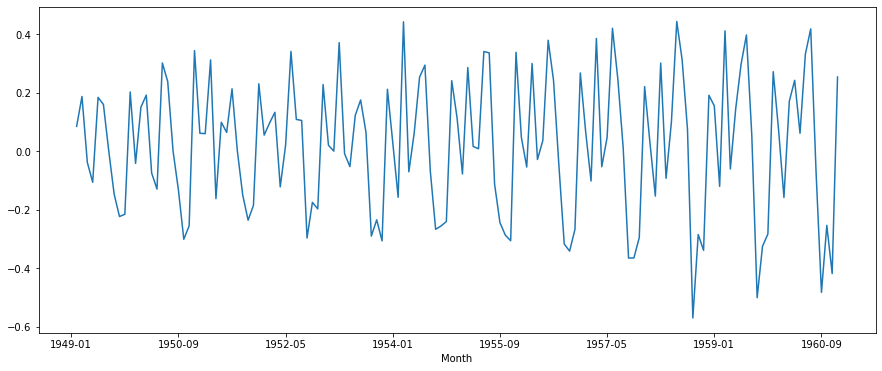

In [27]:
serie_diff.plot()
plt.show()

<font color='OrangeRed'>**Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

<font color='Navy'>**Ho = não é estacionário: estatística do teste > valor crítico**

<font color='Navy'>**Ha = é estacionário:  estatística do teste < valor crítico**

In [28]:
kpss = statsmodels.tsa.stattools.kpss(serie4)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0716
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/home/miguel/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [29]:
# Diferenciação de segunda ordem
serie5 = np.diff(serie4)

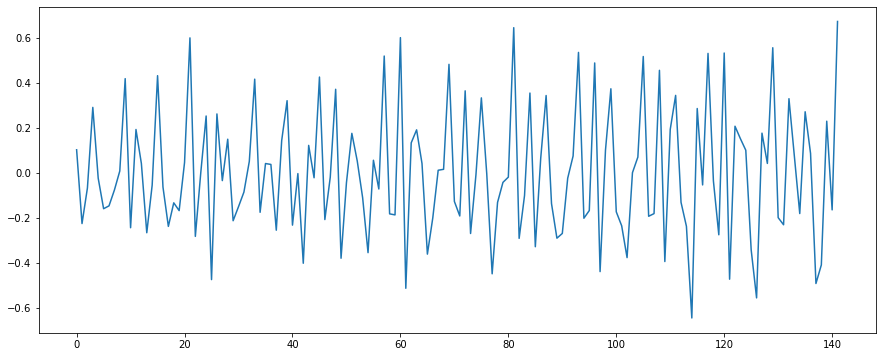

In [30]:
plt.plot(serie5)
plt.show()

In [31]:
kpss = statsmodels.tsa.stattools.kpss(serie5)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0634
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/home/miguel/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
